# ARTIFICIAL NEURAL NETWORK PROJECT ON MNIST DATASET

## Brief installation of Tensorflow

>TensorFlow is tested and supported on the following 64-bit systems:

>1.Ubuntu 16.04 or later

>2.Windows 7 or later

>3.macOS 10.12.6 (Sierra) or later (no GPU support)



> **pip install tensorflow==2.0.0**

> To run from Anaconda Prompt

> **!pip install tensorflow==2.0.0**

> To run from Jupyter Notebook

In [1]:
# Verify installation - 
import tensorflow as tf # Importing Tensorflow updated version 

In [3]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.0.0-rc1
Keras Version: 2.2.4-tf


## A simple classifier using Keras's Sequential API

### Importing required libraries

In [2]:
import numpy as np # importing numpy for genearting arrays and also for mathematical computations
import matplotlib.pyplot as plt # imprting for visualizations
import pandas as pd # for loading dataset
import os
import tensorflow as tf # tensorflow framework
import seaborn as sns # for visualization graphs

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [3]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [8]:
print(X_train_full.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [9]:
print(y_train_full.shape,y_test.shape)

(60000,) (10000,)


In [15]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [11]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



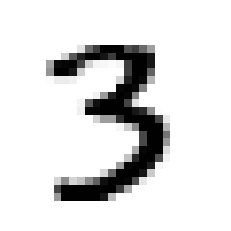

In [12]:
# lets view the first data point of X_train
plt.imshow(X_train[5000], cmap="binary")
plt.axis('off')
plt.show()


<AxesSubplot:>

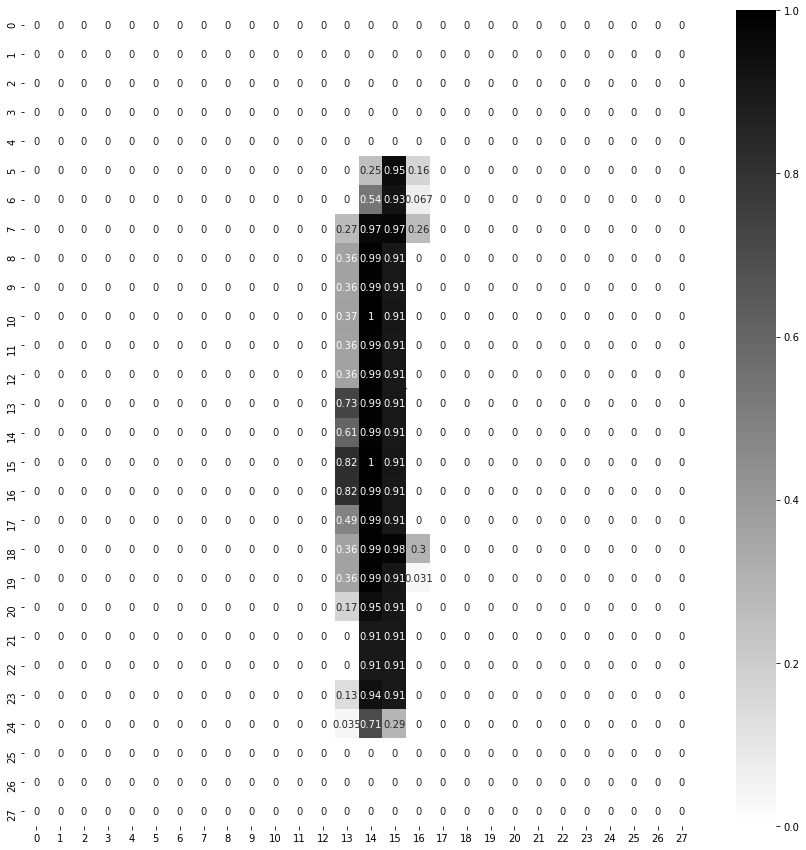

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9000], annot=True, cmap="binary")

In [31]:
# actual value of y_train
y_train.shape

(55000,)

In [33]:
X_train.shape

(55000, 28, 28)

## Creating Artificial Neural Network Model

In [15]:
# Creating Artificial Neural Network model
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"), # which is the input layer
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"), # First hidden layer
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"), # Second hidden layer
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")] # output layer using softmax because of multiclass

model_clf = tf.keras.models.Sequential(LAYERS) # training model layers in a sequntial manner

In [16]:
model_clf.layers # There are 1 input and 1 output layer and 2 hidden layers

In [17]:
model_clf.summary() # summary of created model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10 # rechecking the summary param

(235500, 30100, 1010)

In [19]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [20]:
hidden1 = model_clf.layers[1]
hidden1.name # this is to check the layer name

'hiddenLayer1'

In [21]:
model_clf.get_layer(hidden1.name) is hidden1 

True

In [22]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [23]:
type(hidden1.get_weights())

list

In [24]:
hidden1.get_weights() # these are weights assigned while building a model

[array([[-0.03860669,  0.01446346, -0.06856611, ...,  0.03596935,
         -0.04336561, -0.0262422 ],
        [ 0.03789479,  0.03026592, -0.0531595 , ...,  0.06178288,
         -0.05360165,  0.06551677],
        [ 0.0121085 ,  0.04053824,  0.00539429, ...,  0.00965337,
         -0.07206354, -0.04295393],
        ...,
        [-0.03574486,  0.06625865, -0.05816453, ...,  0.05960816,
         -0.0047649 ,  0.05124222],
        [-0.02277196,  0.02056465,  0.02284487, ..., -0.01158108,
          0.06987822, -0.00450848],
        [-0.01401124,  0.05078663,  0.0592135 , ...,  0.06229931,
         -0.01715873, -0.03053766]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
weights, biases = hidden1.get_weights() # getting weights and bias 

In [26]:
print("shape\n",weights.shape, "\n")

weights

shape
 (784, 300) 



array([[-0.03860669,  0.01446346, -0.06856611, ...,  0.03596935,
        -0.04336561, -0.0262422 ],
       [ 0.03789479,  0.03026592, -0.0531595 , ...,  0.06178288,
        -0.05360165,  0.06551677],
       [ 0.0121085 ,  0.04053824,  0.00539429, ...,  0.00965337,
        -0.07206354, -0.04295393],
       ...,
       [-0.03574486,  0.06625865, -0.05816453, ...,  0.05960816,
        -0.0047649 ,  0.05124222],
       [-0.02277196,  0.02056465,  0.02284487, ..., -0.01158108,
         0.06987822, -0.00450848],
       [-0.01401124,  0.05078663,  0.0592135 , ...,  0.06229931,
        -0.01715873, -0.03053766]], dtype=float32)

In [27]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compiling ANN Model

In [28]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



## Validating our ANN Model

In [29]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 159us/sample - loss: 0.5998 - accuracy: 0.8463 - val_loss: 0.3023 - val_accuracy: 0.9180
Epoch 2/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.2882 - accuracy: 0.9168 - val_loss: 0.2391 - val_accuracy: 0.9358
Epoch 3/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.2371 - accuracy: 0.9322 - val_loss: 0.2045 - val_accuracy: 0.9414
Epoch 4/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.2029 - accuracy: 0.9426 - val_loss: 0.1781 - val_accuracy: 0.9490
Epoch 5/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.1772 - accuracy: 0.9490 - val_loss: 0.1640 - val_accuracy: 0.9542
Epoch 6/30
55000/55000 [==============================] - 8s 150us/sample - loss: 0.1572 - accuracy: 0.9558 - val_loss: 0.1493 - val_accuracy: 0.9594
Epoch 7/30
55000/55000 [===========================

In [30]:
import time
import os
# Creating a custom function to save our model in current directory
def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [31]:
UNIQUE_PATH = model_clf.save(saveModel_path()) 

your model will be saved at the following location
SAVED_MODELS\Model_2020_12_04_17_18_12_.h5


In [32]:
history.params
# parameters of ANN model

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [33]:
pd.DataFrame(history.history) # returning history of ANN model in dataframe

,loss,accuracy,val_loss,val_accuracy
0,0.599778,0.846291,0.302331,0.9180
1,0.288162,0.916818,0.239077,0.9358
2,0.237123,0.932236,0.204472,0.9414
3,0.202886,0.942564,0.178094,0.9490
4,0.177155,0.948982,0.163987,0.9542
5,0.157185,0.955818,0.149295,0.9594
6,0.140619,0.960127,0.135787,0.9646
7,0.127492,0.963527,0.126250,0.9652
8,0.115767,0.967964,0.118856,0.9660
9,0.105951,0.970236,0.113004,0.9682


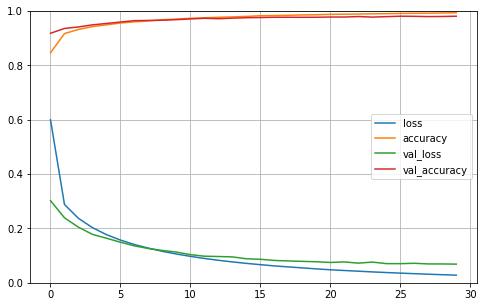

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show() # visualizing loss and accuracy for traing set and validation set

In [40]:
model_clf.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06932397159687244, 0.9793]

In [41]:
X_new = X_test[:3] # taking 3 images from test data
y_proba = model_clf.predict(X_new) # predicting those images
y_proba.round(2) 

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred 

array([7, 2, 1], dtype=int64)

In [43]:
y_test_new = y_test[:3] # saving first 3 images into an object

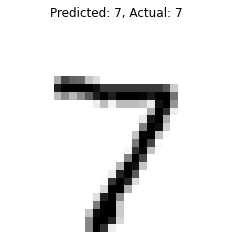

------------------------------------------------------------


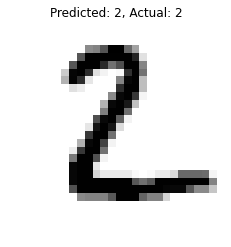

------------------------------------------------------------


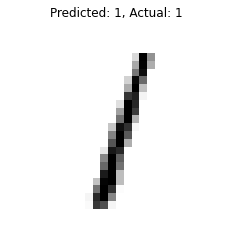

------------------------------------------------------------


In [44]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20) # as we can 3 images 7, 2, 1 predicted correctly

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>